In [4]:
!pip install numpy


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install matplotlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install seaborn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install keras


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install transformers


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
#Import the necessary librabries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, r2_score
import matplotlib.pyplot as plt
import seaborn as sn
from transformers import BertTokenizer, BertForSequenceClassification
from tensorflow.keras.layers import Input, Conv1D, GlobalMaxPooling1D, Dense, Embedding, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
# Load historical stock market data
df = pd.read_csv("C:/Users/hp/Desktop/MLs/EDAhistorical-Nigerian-stock-Exchange/Dataset/NSEAllShareHistoricalData.csv")

In [ ]:
# Exploratory Data Analysis

In [16]:
#To view rows out of the dataset
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/10/2023,"67,133.19","67,100.49","67,152.93","67,100.49",309.32M,0.05%
1,11/10/2023,"67,100.49","66,984.32","67,190.54","66,981.09",410.32M,0.17%
2,10/10/2023,"66,984.62","67,101.39","67,118.93","66,956.31",257.42M,-0.17%
3,09/10/2023,"67,101.57","66,454.57","67,123.22","66,454.57",268.65M,0.97%
4,06/10/2023,"66,454.57","66,532.84","67,188.68","66,210.45",374.09M,-0.17%
...,...,...,...,...,...,...,...
2892,03/02/2012,"20,877.64","20,822.00","20,863.93","20,786.35",NaN,0.27%
2893,02/02/2012,"20,822.00","20,872.94","20,900.58","20,785.40",NaN,0.15%
2894,01/02/2012,"20,790.88","20,875.34","20,941.03","20,790.88",NaN,-0.41%
2895,31/01/2012,"20,875.83","20,818.56","21,009.92","20,789.48",NaN,0.70%


In [18]:
# Explore the first 5 rows
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,12/10/2023,"67,133.19","67,100.49","67,152.93","67,100.49",309.32M,0.05%
1,11/10/2023,"67,100.49","66,984.32","67,190.54","66,981.09",410.32M,0.17%
2,10/10/2023,"66,984.62","67,101.39","67,118.93","66,956.31",257.42M,-0.17%
3,09/10/2023,"67,101.57","66,454.57","67,123.22","66,454.57",268.65M,0.97%
4,06/10/2023,"66,454.57","66,532.84","67,188.68","66,210.45",374.09M,-0.17%


In [19]:
# Explore the last 5 rows
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
2892,03/02/2012,"20,877.64","20,822.00","20,863.93","20,786.35",NaN,0.27%
2893,02/02/2012,"20,822.00","20,872.94","20,900.58","20,785.40",NaN,0.15%
2894,01/02/2012,"20,790.88","20,875.34","20,941.03","20,790.88",NaN,-0.41%
2895,31/01/2012,"20,875.83","20,818.56","21,009.92","20,789.48",NaN,0.70%
2896,30/01/2012,"20,731.72","20,939.10","20,950.02","20,731.72",NaN,-0.77%


In [131]:
# summary statistics for numerical columns
df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,2897,2897,2897,2897,2897,1600,2897
unique,2897,2888,2887,2881,2887,1564,499
top,12/10/2023,"22,109.76","20,658.28","37,259.65","37,278.34",1.17B,0.02%
freq,1,2,3,4,3,3,33


In [21]:
# display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2897 non-null   object
 1   Price     2897 non-null   object
 2   Open      2897 non-null   object
 3   High      2897 non-null   object
 4   Low       2897 non-null   object
 5   Vol.      1600 non-null   object
 6   Change %  2897 non-null   object
dtypes: object(7)
memory usage: 158.6+ KB


In [28]:
# Show null columns
df.isnull()

,Date,Price,Open,High,Low,Vol.,Change %
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2892,False,False,False,False,False,False,False
2893,False,False,False,False,False,False,False
2894,False,False,False,False,False,False,False
2895,False,False,False,False,False,False,False


In [25]:
# Show total number of null values in a column
df.isnull().sum()

Date           0
Price          0
Open           0
High           0
Low            0
Vol.        1297
Change %       0
dtype: int64

In [26]:
# Find the mode of the 'Vol.' column
mode_Vol = df['Vol.'].mode()[0]

# Print the mode value
print("Mode of 'Vol' column:", mode_Vol)

# Fill the missing values in 'Vol.' column with the mode value
df['Vol.'].fillna(mode_Vol, inplace=True)

Mode of 'Vol' column: 1.06B


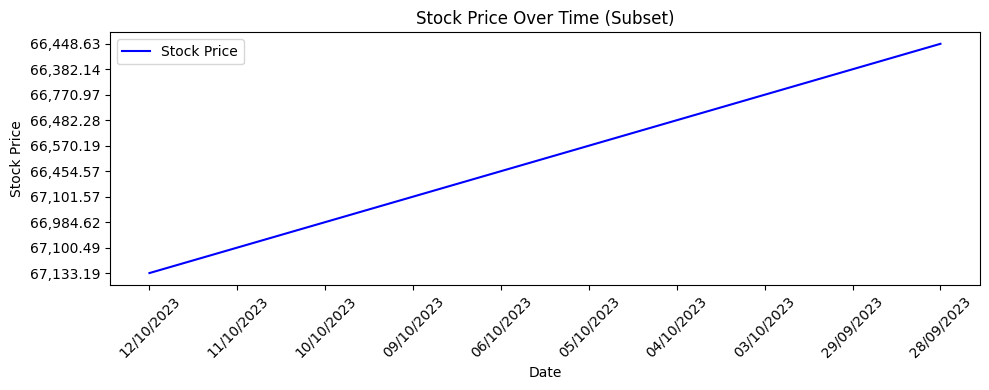

In [27]:
# Select a specific time range (e.g., first 10 rows) for visualization. 
#The reason for selecting rows is due to the fact that, vizualising the large
# dataset will not be visible in the cell of jupyter notebook
subset_df = df[:10]

# Data Visualization
plt.figure(figsize=(10, 4))
plt.plot(subset_df['Date'], subset_df['Price'], label='Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time (Subset)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

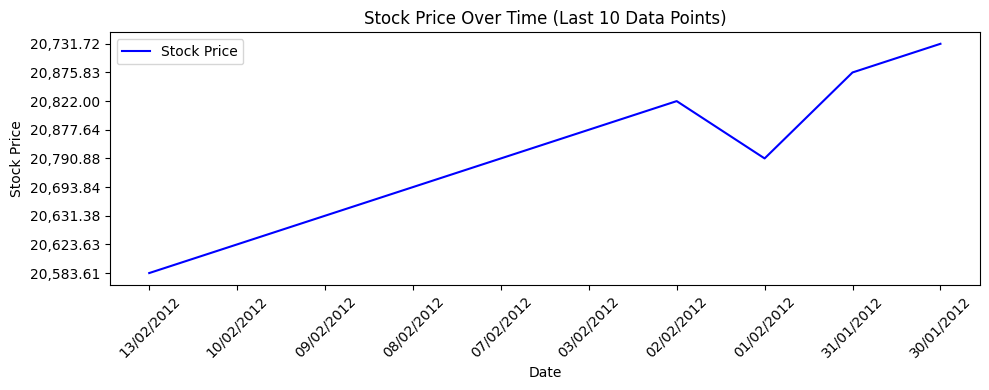

In [30]:
# Select the last 10 rows for visualization
subset_df = df[-10:]

# Data Visualization
plt.figure(figsize=(10, 4))
plt.plot(subset_df['Date'], subset_df['Price'], label='Stock Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time (Last 10 Data Points)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [138]:
missing_values = df.isnull().sum()
print(missing_values)

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64


In [32]:
# display the dataset to check if the missing values in Vol have be replaced with the mode
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/10/2023,"67,133.19","67,100.49","67,152.93","67,100.49",309.32M,0.05%
1,11/10/2023,"67,100.49","66,984.32","67,190.54","66,981.09",410.32M,0.17%
2,10/10/2023,"66,984.62","67,101.39","67,118.93","66,956.31",257.42M,-0.17%
3,09/10/2023,"67,101.57","66,454.57","67,123.22","66,454.57",268.65M,0.97%
4,06/10/2023,"66,454.57","66,532.84","67,188.68","66,210.45",374.09M,-0.17%
...,...,...,...,...,...,...,...
2892,03/02/2012,"20,877.64","20,822.00","20,863.93","20,786.35",1.06B,0.27%
2893,02/02/2012,"20,822.00","20,872.94","20,900.58","20,785.40",1.06B,0.15%
2894,01/02/2012,"20,790.88","20,875.34","20,941.03","20,790.88",1.06B,-0.41%
2895,31/01/2012,"20,875.83","20,818.56","21,009.92","20,789.48",1.06B,0.70%


In [33]:
# Define a function to transform the values
def transform_column_value(value):
    if value.endswith("M"):
        return float(value.replace("M", "")) * 1e6
    elif value.endswith("B"):
        return float(value.replace("B", "")) * 1e9
    else:
        return float(value)  # Handle other cases if needed

# Apply the function to the specific column in your DataFrame
df['Vol.'] = df['Vol.'].apply(transform_column_value)

# Now, the specific column in your DataFrame contains the numeric values

In [69]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/10/2023,67133.19,67100.49,67152.93,67100.49,3.093200e+08,0.05%
1,11/10/2023,67100.49,66984.32,67190.54,66981.09,4.103200e+08,0.17%
2,10/10/2023,66984.62,67101.39,67118.93,66956.31,2.574200e+08,-0.17%
3,09/10/2023,67101.57,66454.57,67123.22,66454.57,2.686500e+08,0.97%
4,06/10/2023,66454.57,66532.84,67188.68,66210.45,3.740900e+08,-0.17%
...,...,...,...,...,...,...,...
2892,03/02/2012,20877.64,20822.00,20863.93,20786.35,1.060000e+09,0.27%
2893,02/02/2012,20822.00,20872.94,20900.58,20785.40,1.060000e+09,0.15%
2894,01/02/2012,20790.88,20875.34,20941.03,20790.88,1.060000e+09,-0.41%
2895,31/01/2012,20875.83,20818.56,21009.92,20789.48,1.060000e+09,0.70%


In [113]:
# Sample value
value = "67,133.19"

# Remove the comma and convert to float
value = float(value.replace(',', ''))

# Print the converted value
print(value)

67133.19


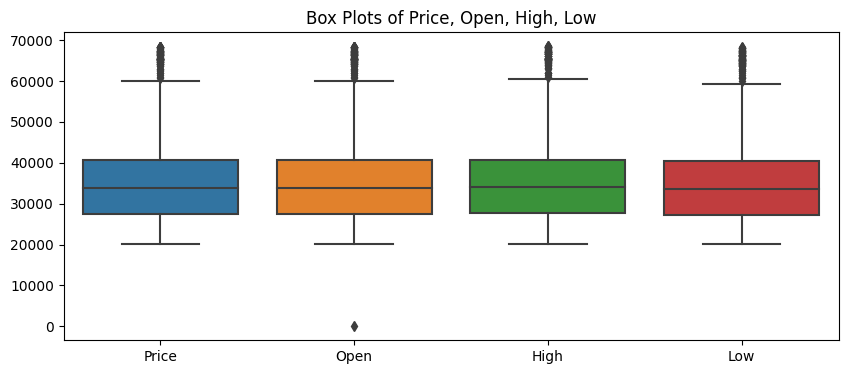

In [68]:
# Now, create the box plot with the cleaned data
plt.figure(figsize=(10, 4))
sn.boxplot(data=df[['Price', 'Open', 'High', 'Low']])
plt.title('Box Plots of Price, Open, High, Low')
plt.show()

In [59]:
import numpy as np
import pandas as pd

def identify_outliers_iqr(df, columns):
    outliers = []
    
    for column in columns:
        data = df[column]
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the outliers
        column_outliers = df[(data < lower_bound) | (data > upper_bound)]
        outliers.append(column_outliers)
    
    return pd.concat(outliers, axis=0, ignore_index=True)

# Example usage:
data = df[['Price', 'Open', 'High', 'Low']]  # Replace with your DataFrame and columns
outliers = identify_outliers_iqr(data, data.columns)
print("Outliers:")
print(outliers)


Outliers:
        Price      Open      High       Low
0    67133.19  67100.49  67152.93  67100.49
1    67100.49  66984.32  67190.54  66981.09
2    66984.62  67101.39  67118.93  66956.31
3    67101.57  66454.57  67123.22  66454.57
4    66454.57  66532.84  67188.68  66210.45
..        ...       ...       ...       ...
287  62019.88  61536.76  62048.05  61509.00
288  61523.57  60720.02  61572.41  60705.92
289  60715.04  61949.24  61949.24  60713.56
290  61948.99  60991.12  61962.70  60991.12
291  60968.27  60109.02  60968.82  60109.02

[292 rows x 4 columns]


In [67]:
data

,Price,Open,High,Low
0,67133.19,67100.49,67152.93,67100.49
1,67100.49,66984.32,67190.54,66981.09
2,66984.62,67101.39,67118.93,66956.31
3,67101.57,66454.57,67123.22,66454.57
4,66454.57,66532.84,67188.68,66210.45
...,...,...,...,...
2892,20877.64,20822.00,20863.93,20786.35
2893,20822.00,20872.94,20900.58,20785.40
2894,20790.88,20875.34,20941.03,20790.88
2895,20875.83,20818.56,21009.92,20789.48


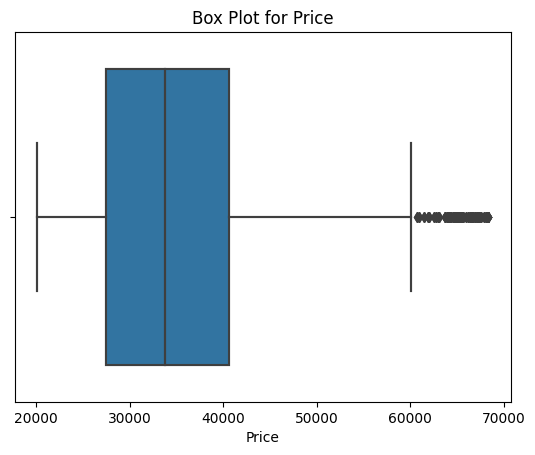

In [38]:
import seaborn as sn
import matplotlib.pyplot as plt

# Create a box plot for a specific column, e.g., 'Price'
sn.boxplot(data=df, x='Price')

# Customize the whisker definition (whis) if needed, e.g., whis=1.5
sn.boxplot(data=df, x='Price', whis=1.5)

plt.title('Box Plot for Price')
plt.show()

In [57]:
import numpy as np
import pandas as pd

def identify_outliers_iqr(df, columns):
    outliers = []
    
    for column in columns:
        data = df[column]
        # Calculate the first quartile (Q1) and third quartile (Q3)
        Q1 = np.percentile(data, 25)
        Q3 = np.percentile(data, 75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the lower and upper bounds to identify outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the outliers
        column_outliers = df[(data < lower_bound) | (data > upper_bound)]
        outliers.append(column_outliers)
    
    return pd.concat(outliers, axis=0, ignore_index=True)

# Example usage:
data = df[['Price', 'Open', 'High', 'Low']]  # Replace with your DataFrame and columns
outliers = identify_outliers_iqr(data, data.columns)
print("Outliers:")
outliers


Outliers:


,Price,Open,High,Low
0,67133.19,67100.49,67152.93,67100.49
1,67100.49,66984.32,67190.54,66981.09
2,66984.62,67101.39,67118.93,66956.31
3,67101.57,66454.57,67123.22,66454.57
4,66454.57,66532.84,67188.68,66210.45
...,...,...,...,...
287,62019.88,61536.76,62048.05,61509.00
288,61523.57,60720.02,61572.41,60705.92
289,60715.04,61949.24,61949.24,60713.56
290,61948.99,60991.12,61962.70,60991.12


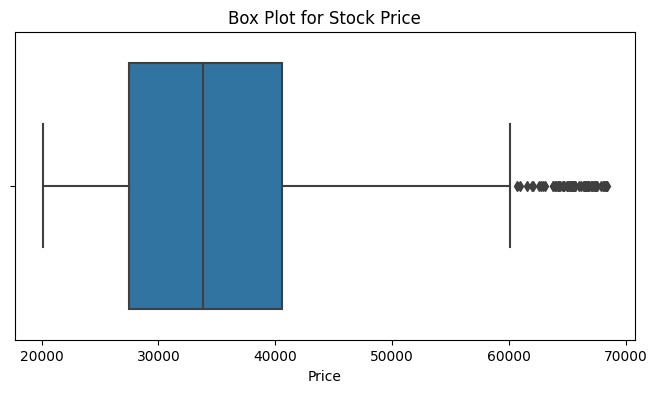

Trimmed DataFrame:
            Date     Price      Open      High       Low          Vol.  \
93    26/05/2023  52973.88  52821.60  52991.18  52415.13  4.617800e+08   
94    25/05/2023  52821.64  52927.60  52928.28  52723.15  3.771400e+08   
95    24/05/2023  52927.60  52621.19  52942.62  52581.88  4.551800e+08   
96    23/05/2023  52621.19  52374.89  52621.19  52361.95  3.509700e+08   
97    22/05/2023  52369.13  52187.93  52369.13  52145.28  3.156800e+08   
...          ...       ...       ...       ...       ...           ...   
2892  03/02/2012  20877.64  20822.00  20863.93  20786.35  1.060000e+09   
2893  02/02/2012  20822.00  20872.94  20900.58  20785.40  1.060000e+09   
2894  01/02/2012  20790.88  20875.34  20941.03  20790.88  1.060000e+09   
2895  31/01/2012  20875.83  20818.56  21009.92  20789.48  1.060000e+09   
2896  30/01/2012  20731.72  20939.10  20950.02  20731.72  1.060000e+09   

     Change %  
93      0.29%  
94     -0.20%  
95      0.58%  
96      0.48%  
97      0.35

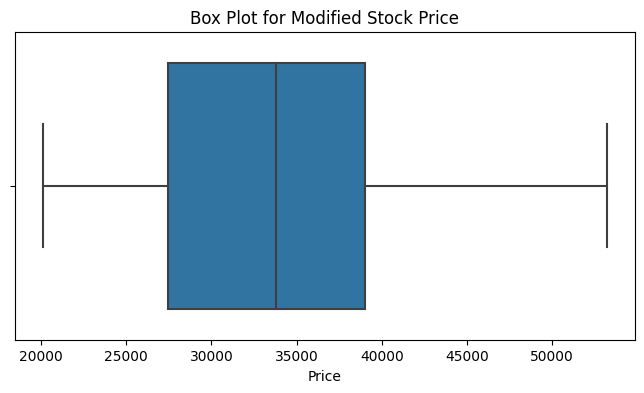

In [143]:
# Identify and visualize outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Price')
plt.title('Box Plot for Stock Price')
plt.show()

# Handling outliers using techniques:
# 1. Data Trimming
# Define a threshold for acceptable values (e.g., 95th percentile)
threshold = np.percentile(df['Price'], 95)

# Trim values above the threshold
trimmed_df = df[df['Price'] <= threshold]

# 2. Data Transformation (e.g., log transformation)
# Log transform the 'Price' column
df['Log_Price'] = np.log(df['Price'])

# 3. Winsorization
# Specify the lower and upper percentiles to winsorize (e.g., 1st and 99th percentiles)
from scipy.stats.mstats import winsorize
winsorized_data = winsorize(df['Price'], limits=[0.01, 0.01])

# 4. Data Imputation
# Impute outliers with the median value
median_value = np.median(df['Price'])
df.loc[df['Price'] > threshold, 'Price'] = median_value

# Display the modified DataFrame
print("Trimmed DataFrame:")
print(trimmed_df)
print("\nLog-Transformed DataFrame:")
print(df)
print("\nWinsorized Data:")
print(winsorized_data)

# Visualize the modified data
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Price')
plt.title('Box Plot for Modified Stock Price')
plt.show()

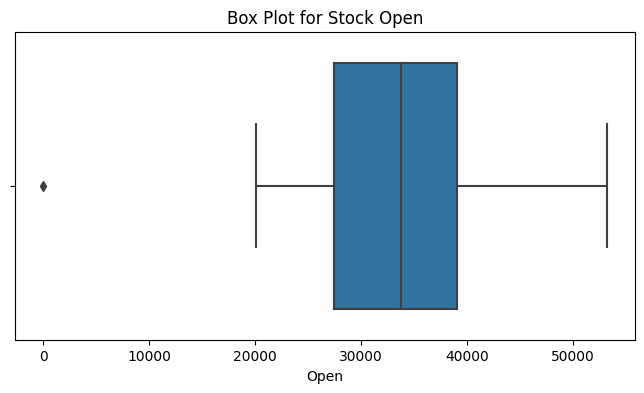

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Trimmed DataFrame:
            Date     Price      Open      High       Low          Vol.  \
0     12/10/2023  33736.68  33736.68  67152.93  67100.49  3.093200e+08   
1     11/10/2023  33736.68  33736.68  67190.54  66981.09  4.103200e+08   
2     10/10/2023  33736.68  33736.68  67118.93  66956.31  2.574200e+08   
3     09/10/2023  33736.68  33736.68  67123.22  66454.57  2.686500e+08   
4     06/10/2023  33736.68  33736.68  67188.68  66210.45  3.740900e+08   
...          ...       ...       ...       ...       ...           ...   
2892  03/02/2012  20877.64  20822.00  20863.93  20786.35  1.060000e+09   
2893  02/02/2012  20822.00  20872.94  20900.58  20785.40  1.060000e+09   
2894  01/02/2012  20790.88  20875.34  20941.03  20790.88  1.060000e+09   
2895  31/01/2012  20875.83  20818.56  21009.92  20789.48  1.060000e+09   
2896  30/01/2012  20731.72  20939.10  20950.02  20731.72  1.060000e+09   

     Change %  Log_Price   Log_Open  
0       0.05%  11.113947  11.113947  
1       0.17%  1

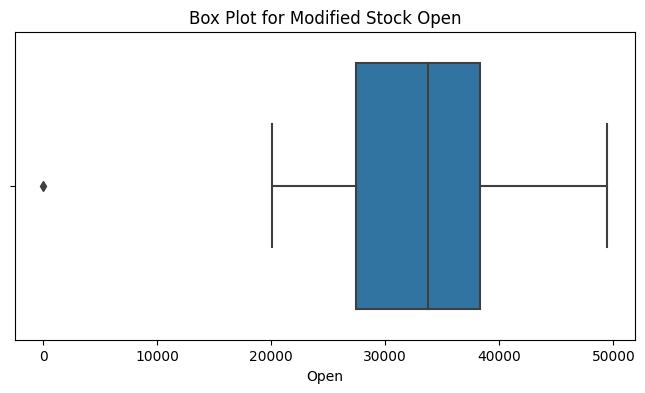

In [149]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Open')
plt.title('Box Plot for Stock Open')
plt.show()

# Handling outliers using techniques:
# 1. Data Trimming
# Define a threshold for acceptable values (e.g., 95th percentile)
threshold = np.percentile(df['Open'], 95)

# Trim values above the threshold
trimmed_df = df[df['Open'] <= threshold]

# 2. Data Transformation (e.g., log transformation)
# Log transform the 'Price' column
df['Log_Open'] = np.log(df['Open'])

# 3. Winsorization
# Specify the lower and upper percentiles to winsorize (e.g., 1st and 99th percentiles)
from scipy.stats.mstats import winsorize
winsorized_data = winsorize(df['Open'], limits=[0.01, 0.01])

# 4. Data Imputation
# Impute outliers with the median value
median_value = np.median(df['Open'])
df.loc[df['Open'] > threshold, 'Open'] = median_value

# Display the modified DataFrame
print("Trimmed DataFrame:")
print(trimmed_df)
print("\nLog-Transformed DataFrame:")
print(df)
print("\nWinsorized Data:")
print(winsorized_data)

# Visualize the modified data
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Open')
plt.title('Box Plot for Modified Stock Open')
plt.show()

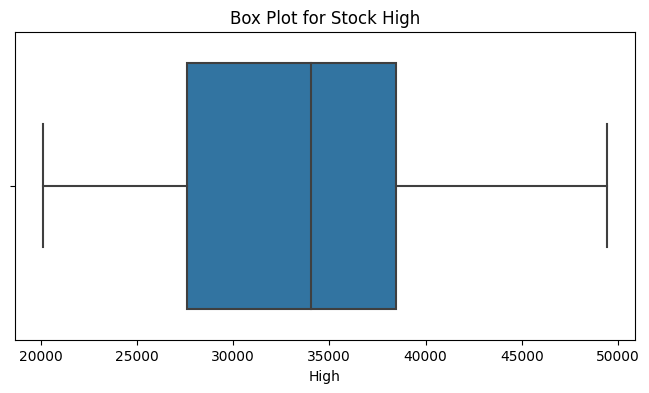

Trimmed DataFrame:
            Date     Price      Open      High       Low          Vol.  \
0     12/10/2023  33736.68  33736.68  34065.72  67100.49  3.093200e+08   
1     11/10/2023  33736.68  33736.68  34065.72  66981.09  4.103200e+08   
2     10/10/2023  33736.68  33736.68  34065.72  66956.31  2.574200e+08   
3     09/10/2023  33736.68  33736.68  34065.72  66454.57  2.686500e+08   
4     06/10/2023  33736.68  33736.68  34065.72  66210.45  3.740900e+08   
...          ...       ...       ...       ...       ...           ...   
2892  03/02/2012  20877.64  20822.00  20863.93  20786.35  1.060000e+09   
2893  02/02/2012  20822.00  20872.94  20900.58  20785.40  1.060000e+09   
2894  01/02/2012  20790.88  20875.34  20941.03  20790.88  1.060000e+09   
2895  31/01/2012  20875.83  20818.56  21009.92  20789.48  1.060000e+09   
2896  30/01/2012  20731.72  20939.10  20950.02  20731.72  1.060000e+09   

     Change %  Log_Price   Log_Open  
0       0.05%  11.113947  10.426341  
1       0.17%  1

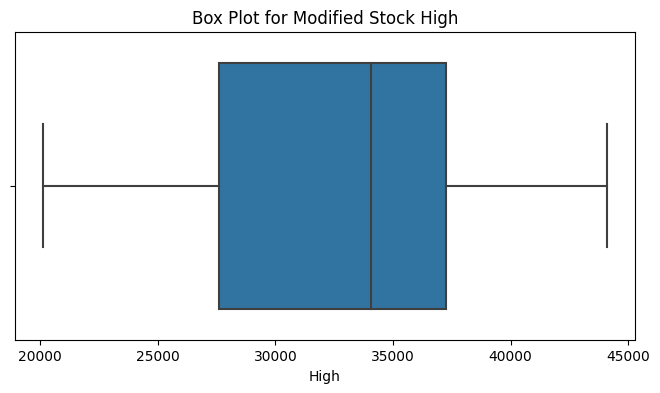

In [152]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='High')
plt.title('Box Plot for Stock High')
plt.show()

# Handling outliers using techniques:
# 1. Data Trimming
# Define a threshold for acceptable values (e.g., 95th percentile)
threshold = np.percentile(df['High'], 95)

# Trim values above the threshold
trimmed_df = df[df['High'] <= threshold]

# 2. Data Transformation (e.g., log transformation)
# Log transform the 'Price' column
df['Log_High'] = np.log(df['High'])

# 3. Winsorization
# Specify the lower and upper percentiles to winsorize (e.g., 1st and 99th percentiles)
from scipy.stats.mstats import winsorize
winsorized_data = winsorize(df['High'], limits=[0.01, 0.01])

# 4. Data Imputation
# Impute outliers with the median value
median_value = np.median(df['High'])
df.loc[df['High'] > threshold, 'High'] = median_value

# Display the modified DataFrame
print("Trimmed DataFrame:")
print(trimmed_df)
print("\nLog-Transformed DataFrame:")
print(df)
print("\nWinsorized Data:")
print(winsorized_data)

# Visualize the modified data
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='High')
plt.title('Box Plot for Modified Stock High')
plt.show()

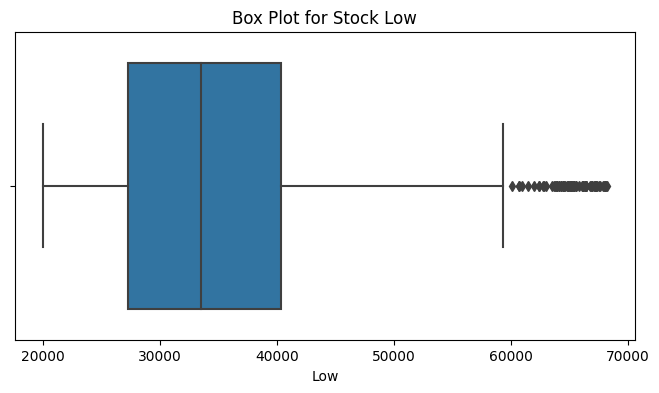

Trimmed DataFrame:
            Date     Price      Open      High       Low          Vol.  \
92    30/05/2023  33811.08  33736.68  34065.72  52973.88  1.080000e+09   
93    26/05/2023  52973.88  33736.68  34065.72  52415.13  4.617800e+08   
94    25/05/2023  52821.64  33736.68  34065.72  52723.15  3.771400e+08   
95    24/05/2023  52927.60  33736.68  34065.72  52581.88  4.551800e+08   
96    23/05/2023  52621.19  33736.68  34065.72  52361.95  3.509700e+08   
...          ...       ...       ...       ...       ...           ...   
2892  03/02/2012  20877.64  20822.00  20863.93  20786.35  1.060000e+09   
2893  02/02/2012  20822.00  20872.94  20900.58  20785.40  1.060000e+09   
2894  01/02/2012  20790.88  20875.34  20941.03  20790.88  1.060000e+09   
2895  31/01/2012  20875.83  20818.56  21009.92  20789.48  1.060000e+09   
2896  30/01/2012  20731.72  20939.10  20950.02  20731.72  1.060000e+09   

     Change %  Log_Price   Log_Open   Log_High  
92      5.23%  10.877554  10.877554  10.436

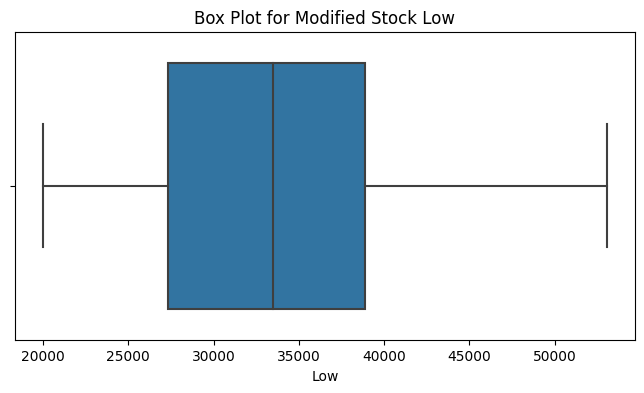

In [153]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Low')
plt.title('Box Plot for Stock Low')
plt.show()

# Handling outliers using techniques:
# 1. Data Trimming
# Define a threshold for acceptable values (e.g., 95th percentile)
threshold = np.percentile(df['Low'], 95)

# Trim values above the threshold
trimmed_df = df[df['Low'] <= threshold]

# 2. Data Transformation (e.g., log transformation)
# Log transform the 'Price' column
df['Log_Low'] = np.log(df['Low'])

# 3. Winsorization
# Specify the lower and upper percentiles to winsorize (e.g., 1st and 99th percentiles)
from scipy.stats.mstats import winsorize
winsorized_data = winsorize(df['Low'], limits=[0.01, 0.01])

# 4. Data Imputation
# Impute outliers with the median value
median_value = np.median(df['Low'])
df.loc[df['Low'] > threshold, 'Low'] = median_value

# Display the modified DataFrame
print("Trimmed DataFrame:")
print(trimmed_df)
print("\nLog-Transformed DataFrame:")
print(df)
print("\nWinsorized Data:")
print(winsorized_data)

# Visualize the modified data
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Low')
plt.title('Box Plot for Modified Stock Low')
plt.show()

In [70]:
# Define a function to transform the 'Change %' column
def transform_change_percentage(percentage):
    try:
        return float(percentage.rstrip('%')) / 100
    except (ValueError, AttributeError):
        return percentage  # Return the original value if it cannot be converted

# Apply the transformation to the entire 'Change %' column
df['Change %'] = df['Change %'].apply(transform_change_percentage)

# Display the modified DataFrame
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/10/2023,67133.19,67100.49,67152.93,67100.49,3.093200e+08,0.0005
1,11/10/2023,67100.49,66984.32,67190.54,66981.09,4.103200e+08,0.0017
2,10/10/2023,66984.62,67101.39,67118.93,66956.31,2.574200e+08,-0.0017
3,09/10/2023,67101.57,66454.57,67123.22,66454.57,2.686500e+08,0.0097
4,06/10/2023,66454.57,66532.84,67188.68,66210.45,3.740900e+08,-0.0017
...,...,...,...,...,...,...,...
2892,03/02/2012,20877.64,20822.00,20863.93,20786.35,1.060000e+09,0.0027
2893,02/02/2012,20822.00,20872.94,20900.58,20785.40,1.060000e+09,0.0015
2894,01/02/2012,20790.88,20875.34,20941.03,20790.88,1.060000e+09,-0.0041
2895,31/01/2012,20875.83,20818.56,21009.92,20789.48,1.060000e+09,0.0070


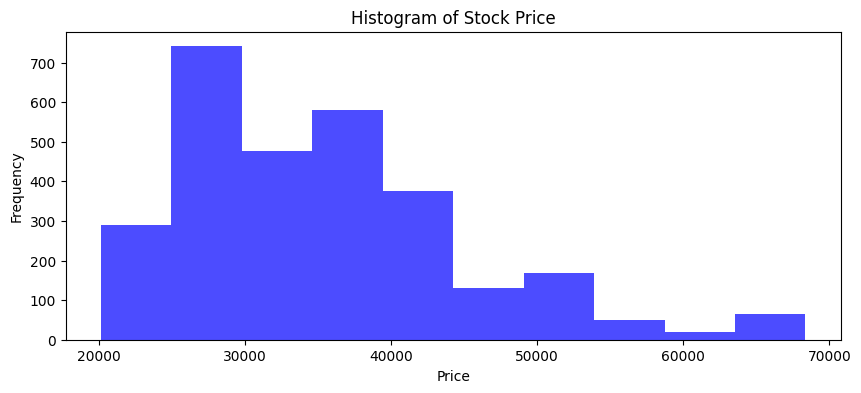

NameError: name 'sns' is not defined

<Figure size 800x400 with 0 Axes>

In [71]:
# Summary statistics
summary_stats = df['Price'].describe()

# Histogram for Price
plt.figure(figsize=(10, 4))
plt.hist(df['Price'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Stock Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for Price
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Price', color='blue')
plt.title('Box Plot of Stock Price')
plt.show()

# Bar chart for change
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Change %', palette='coolwarm')
plt.title('Count of Change % ')
plt.xlabel('Change %')
plt.ylabel('Count')
plt.show()

# Select only numerical columns for correlation analysis
numerical_columns = df[['Price', 'Vol.', 'High','Low','Change %']]

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


# Pair plot (scatter plots for numerical variables)
sns.pairplot(df[['Price', 'Vol.', 'Change %']])

# Display summary statistics
print("Summary Statistics for Price:")
print(summary_stats)



# Display pair plot
plt.show()


In [178]:
# This section perfprm Bivariate EDA on the the dataset

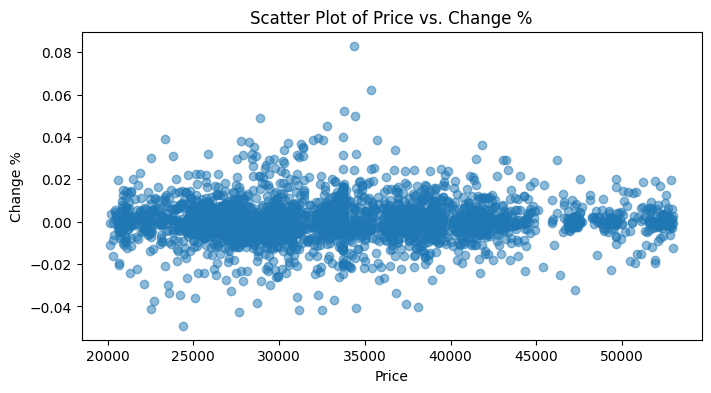

In [180]:
import matplotlib.pyplot as plt

# Scatter plot of Price vs. Change %
plt.figure(figsize=(8, 4))
plt.scatter(df['Price'], df['Change %'], alpha=0.5)
plt.title('Scatter Plot of Price vs. Change %')
plt.xlabel('Price')
plt.ylabel('Change %')
plt.show()

In [181]:
# Correlation Analysis:

# You can calculate the correlation coefficient between 'Price' and 'Change %':
correlation = df['Price'].corr(df['Change %'])
print(f'Correlation between Price and Change %: {correlation}')

Correlation between Price and Change %: 0.01743277787435208


In [182]:
# Regression Analysis:

# You can perform a linear regression analysis to predict 'Price' based on 'Change %':
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model = LinearRegression()

# Prepare the data
X = df[['Change %']].values
y = df['Price'].values

# Fit the model
model.fit(X, y)

# Get the coefficients and intercept
slope = model.coef_[0]
intercept = model.intercept_

print(f'Linear Regression Equation: Price = {slope:.2f} * Change % + {intercept:.2f}')


Linear Regression Equation: Price = 13887.39 * Change % + 33911.38


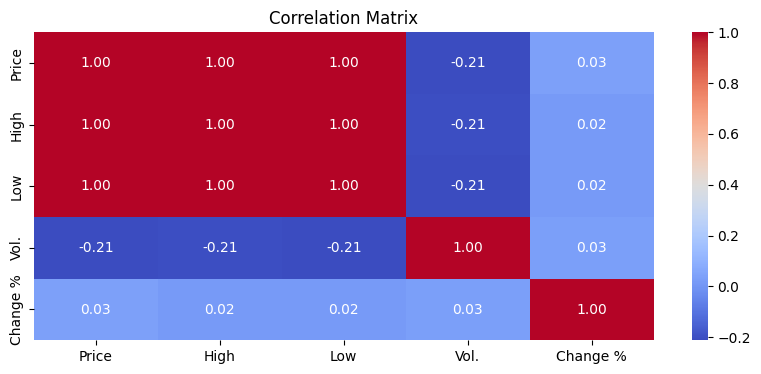

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
selected_columns = ['Price', 'High', 'Low', 'Vol.', 'Change %']
data = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [73]:
data

,Price,High,Low,Vol.,Change %
0,67133.19,67152.93,67100.49,3.093200e+08,0.0005
1,67100.49,67190.54,66981.09,4.103200e+08,0.0017
2,66984.62,67118.93,66956.31,2.574200e+08,-0.0017
3,67101.57,67123.22,66454.57,2.686500e+08,0.0097
4,66454.57,67188.68,66210.45,3.740900e+08,-0.0017
...,...,...,...,...,...
2892,20877.64,20863.93,20786.35,1.060000e+09,0.0027
2893,20822.00,20900.58,20785.40,1.060000e+09,0.0015
2894,20790.88,20941.03,20790.88,1.060000e+09,-0.0041
2895,20875.83,21009.92,20789.48,1.060000e+09,0.0070
